In [69]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd

import shapely.vectorized as sv

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [2]:
correction, nameout, label = 'quantile-quantile', 'QQc', 'ISIMIP_QM'
# correction, nameout, label = 'linear-regression', 'LRc', 'Linear Regression'

print(f'Correction method: {correction}')

Correction method: quantile-quantile


In [92]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson')) 
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002
Tr = [5,  10,  20,  50, 100, 200]

In [5]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','6_DOWN_BCorrected')

In [31]:
def Mevd_concat(product, time_reso, pos=3):
    # pos = 3, 50 years
    seeds = [7, 19, 31, 53, 89, 127, 211, 307, 401, 509, 613, 727, 839, 947, 1051]

    Mevs_3d = []
    for seed in seeds:

        if product == 'ENSEMBLE_mean':
            dir_data = os.path.join(dir_base,f'ITALY_ENSEMBLE_ALL_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_mean_{nameout}_{str(seed).zfill(4)}.nc')
        elif product == 'ENSEMBLE_median':
            dir_data = os.path.join(dir_base,f'ITALY_ENSEMBLE_ALL_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_median_{nameout}_{str(seed).zfill(4)}.nc')
        else:
            dir_data = os.path.join(dir_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}_{str(seed).zfill(4)}.nc')

        DATA = xr.open_dataset(dir_data)
        lon2d, lat2d = np.meshgrid(DATA.lon.values, DATA.lat.values)
        Mev_d_tmp = DATA.Mev_d.values[pos]
        Mevs_3d.append(Mev_d_tmp)

    Mev_d = np.stack(Mevs_3d, axis=0)
    return Mev_d, lon2d, lat2d

In [49]:
pos = 3
Mev_dIMERG, lon2dIM, lat2dIM = Mevd_concat('IMERG', '1dy')
Mev_dCMORPH, lon2dCM, lat2dCM = Mevd_concat('CMORPH', '3h')
Mev_dERA5, lon2dER, lat2dER = Mevd_concat('ERA5', '3h')
Mev_dMSWEP, lon2dMS, lat2dMS = Mevd_concat('MSWEP', '3h')
Mev_dGSMaP, lon2dGS, lat2dGS = Mevd_concat('GSMaP', '3h')
Mev_dCHIRPS, lon2dCH, lat2dCH = Mevd_concat('CHIRPS', '1dy')
Mev_dEnsemble_mean, _, _ = Mevd_concat('ENSEMBLE_mean', '1dy')
Mev_dEnsemble_median, _, _ = Mevd_concat('ENSEMBLE_median', '1dy')

In [43]:
Mev_dIMERG = np.where(Mev_dIMERG>=400, 400, Mev_dIMERG)
Mev_dCMORPH = np.where(Mev_dCMORPH>=400, 400, Mev_dCMORPH)
Mev_dERA5 = np.where(Mev_dERA5>=400, 400, Mev_dERA5)
Mev_dMSWEP = np.where(Mev_dMSWEP>=400, 400, Mev_dMSWEP)
Mev_dGSMaP = np.where(Mev_dGSMaP>=400, 400, Mev_dGSMaP)
Mev_dCHIRPS = np.where(Mev_dCHIRPS>=400, 400, Mev_dCHIRPS)

In [65]:
Mev_dIMERG_mean = np.mean(Mev_dIMERG, axis=0)
Mev_dCMORPH_mean = np.mean(Mev_dCMORPH, axis=0)
Mev_dMSWEP_mean = np.mean(Mev_dMSWEP, axis=0)
Mev_dERA5_mean = np.mean(Mev_dERA5, axis=0)
Mev_dGSMaP_mean = np.mean(Mev_dGSMaP, axis=0)
Mev_dCHIRPS_mean = np.mean(Mev_dCHIRPS, axis=0)
Mev_dEnsemble_mean_mean = np.mean(Mev_dEnsemble_mean, axis=0)
Mev_dEnsemble_median_mean = np.mean(Mev_dEnsemble_median, axis=0)

Mev_dIMERG_std = np.std(Mev_dIMERG, axis=0)
Mev_dCMORPH_std = np.std(Mev_dCMORPH, axis=0)
Mev_dMSWEP_std = np.std(Mev_dMSWEP, axis=0)
Mev_dERA5_std = np.std(Mev_dERA5, axis=0)
Mev_dGSMaP_std = np.std(Mev_dGSMaP, axis=0)
Mev_dCHIRPS_std = np.std(Mev_dCHIRPS, axis=0)
Mev_dEnsemble_mean_std = np.std(Mev_dEnsemble_mean, axis=0)
Mev_dEnsemble_median_std = np.std(Mev_dEnsemble_median, axis=0)

Text(0.0, 1.0, '(f) dCHIRPS')

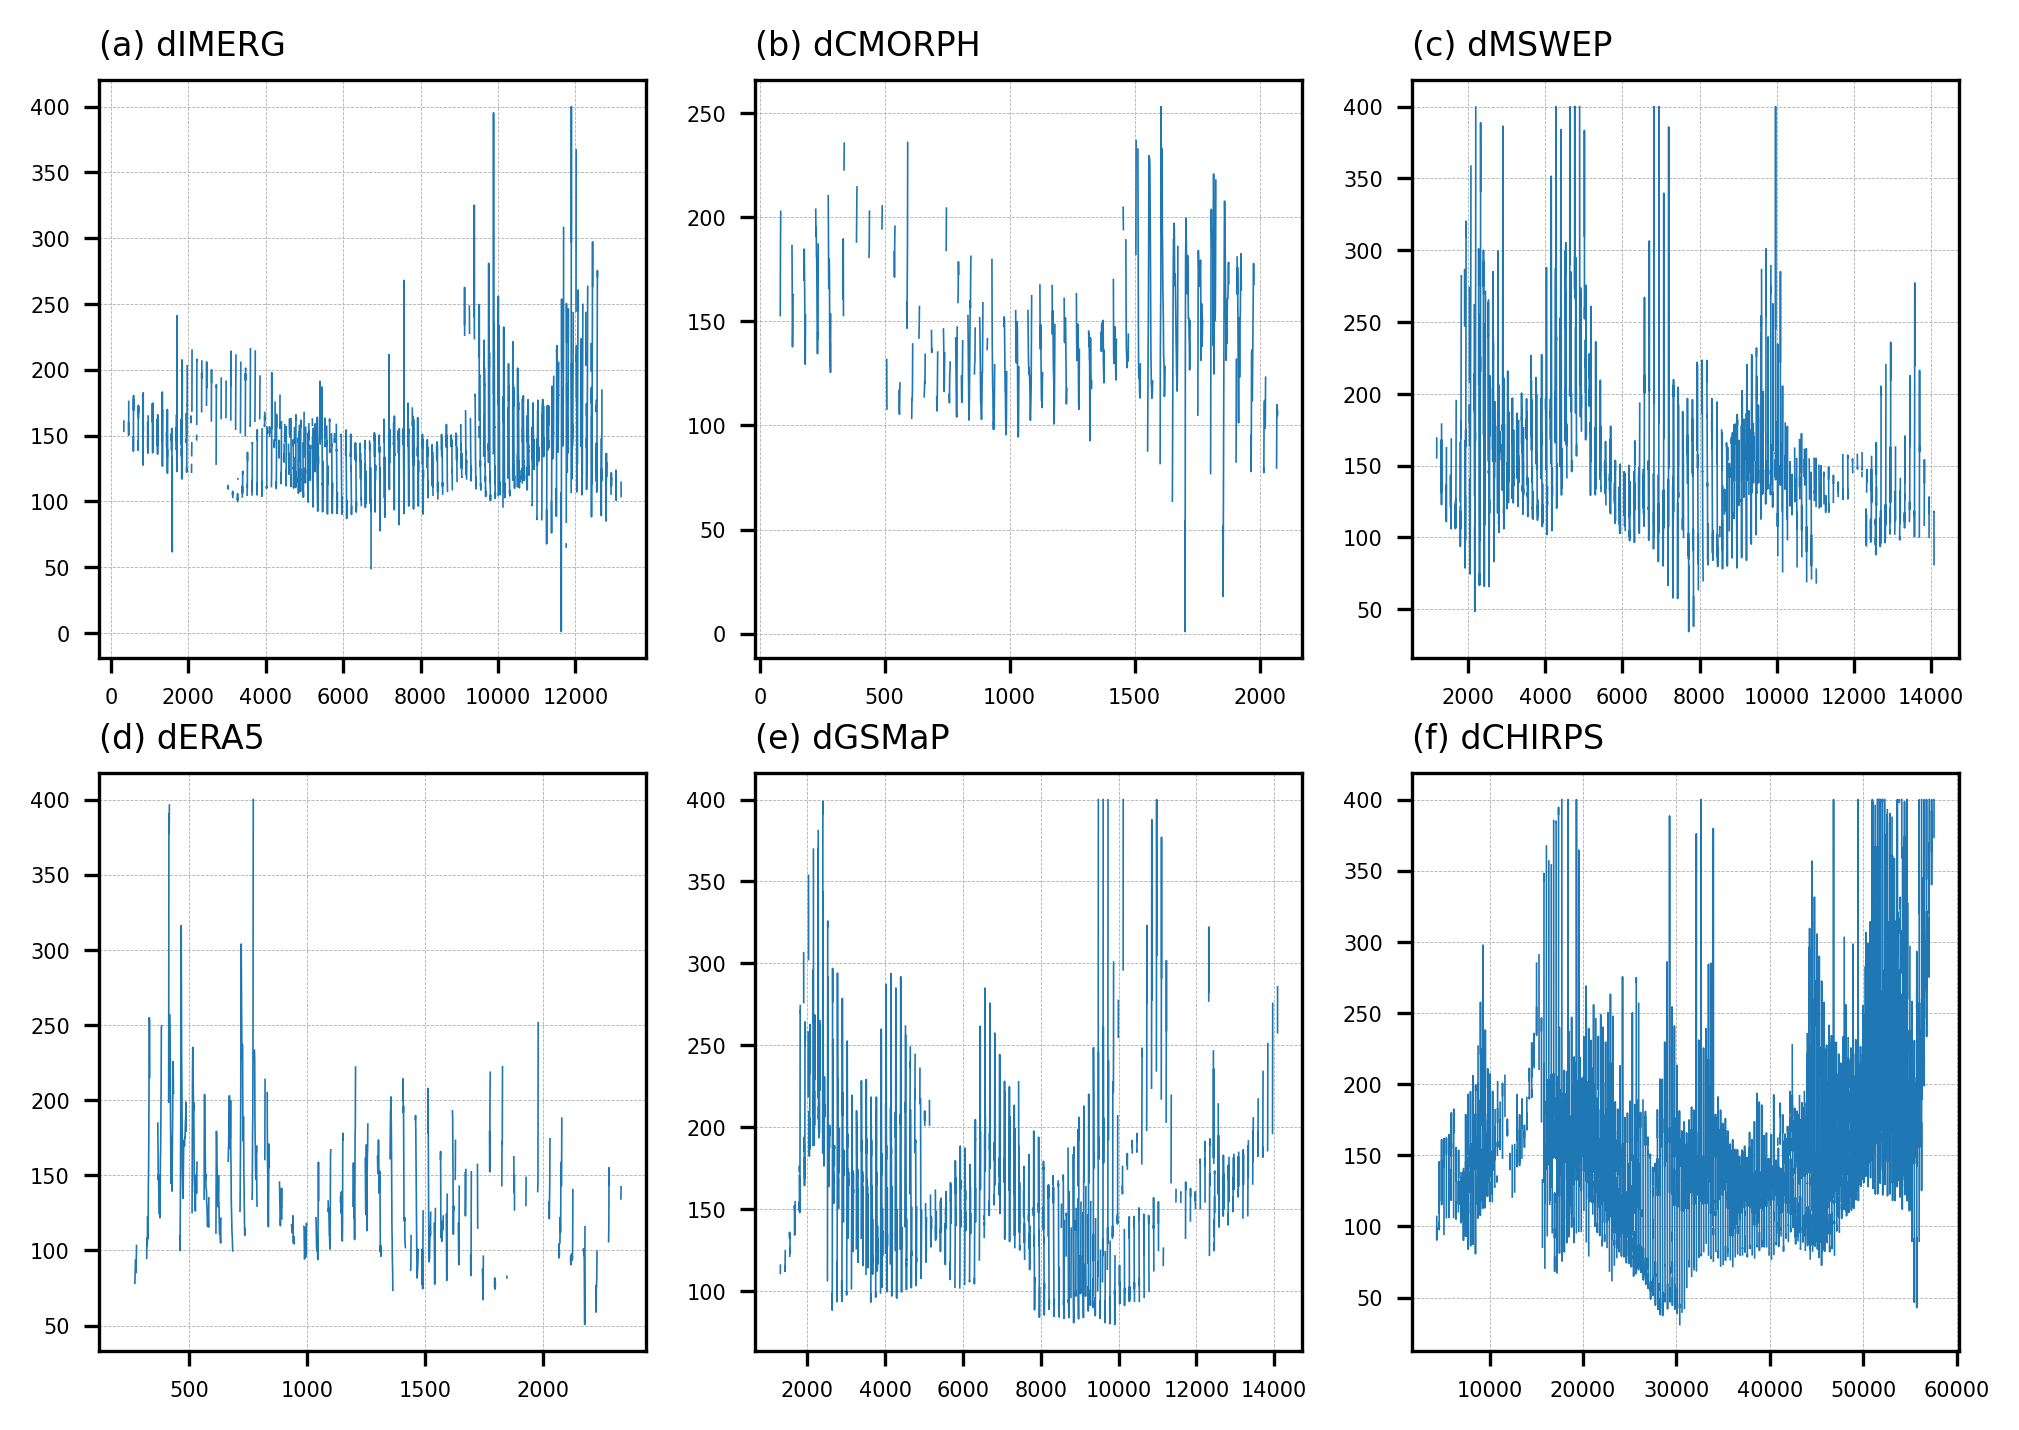

In [45]:
fonttitle = 8

fig = plt.figure(figsize=(8, 5.5), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol])
        ax.grid(linestyle='--', linewidth=0.2)
        ax.tick_params(axis='both', which='major', labelsize=5)
        axes.append(ax)

a1 = axes[0].plot(Mev_dIMERG_mean.flatten(), linewidth=0.4)
a1 = axes[1].plot(Mev_dCMORPH_mean.flatten(), linewidth=0.4)
a1 = axes[2].plot(Mev_dMSWEP_mean.flatten(), linewidth=0.4)
a1 = axes[3].plot(Mev_dERA5_mean.flatten(), linewidth=0.4)
a1 = axes[4].plot(Mev_dGSMaP_mean.flatten(), linewidth=0.4)
a1 = axes[5].plot(Mev_dCHIRPS_mean.flatten(), linewidth=0.4)

axes[0].set_title('(a) dIMERG', fontsize=fonttitle, loc='left')
axes[1].set_title('(b) dCMORPH', fontsize=fonttitle, loc='left')
axes[2].set_title('(c) dMSWEP', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS', fontsize=fonttitle, loc='left')

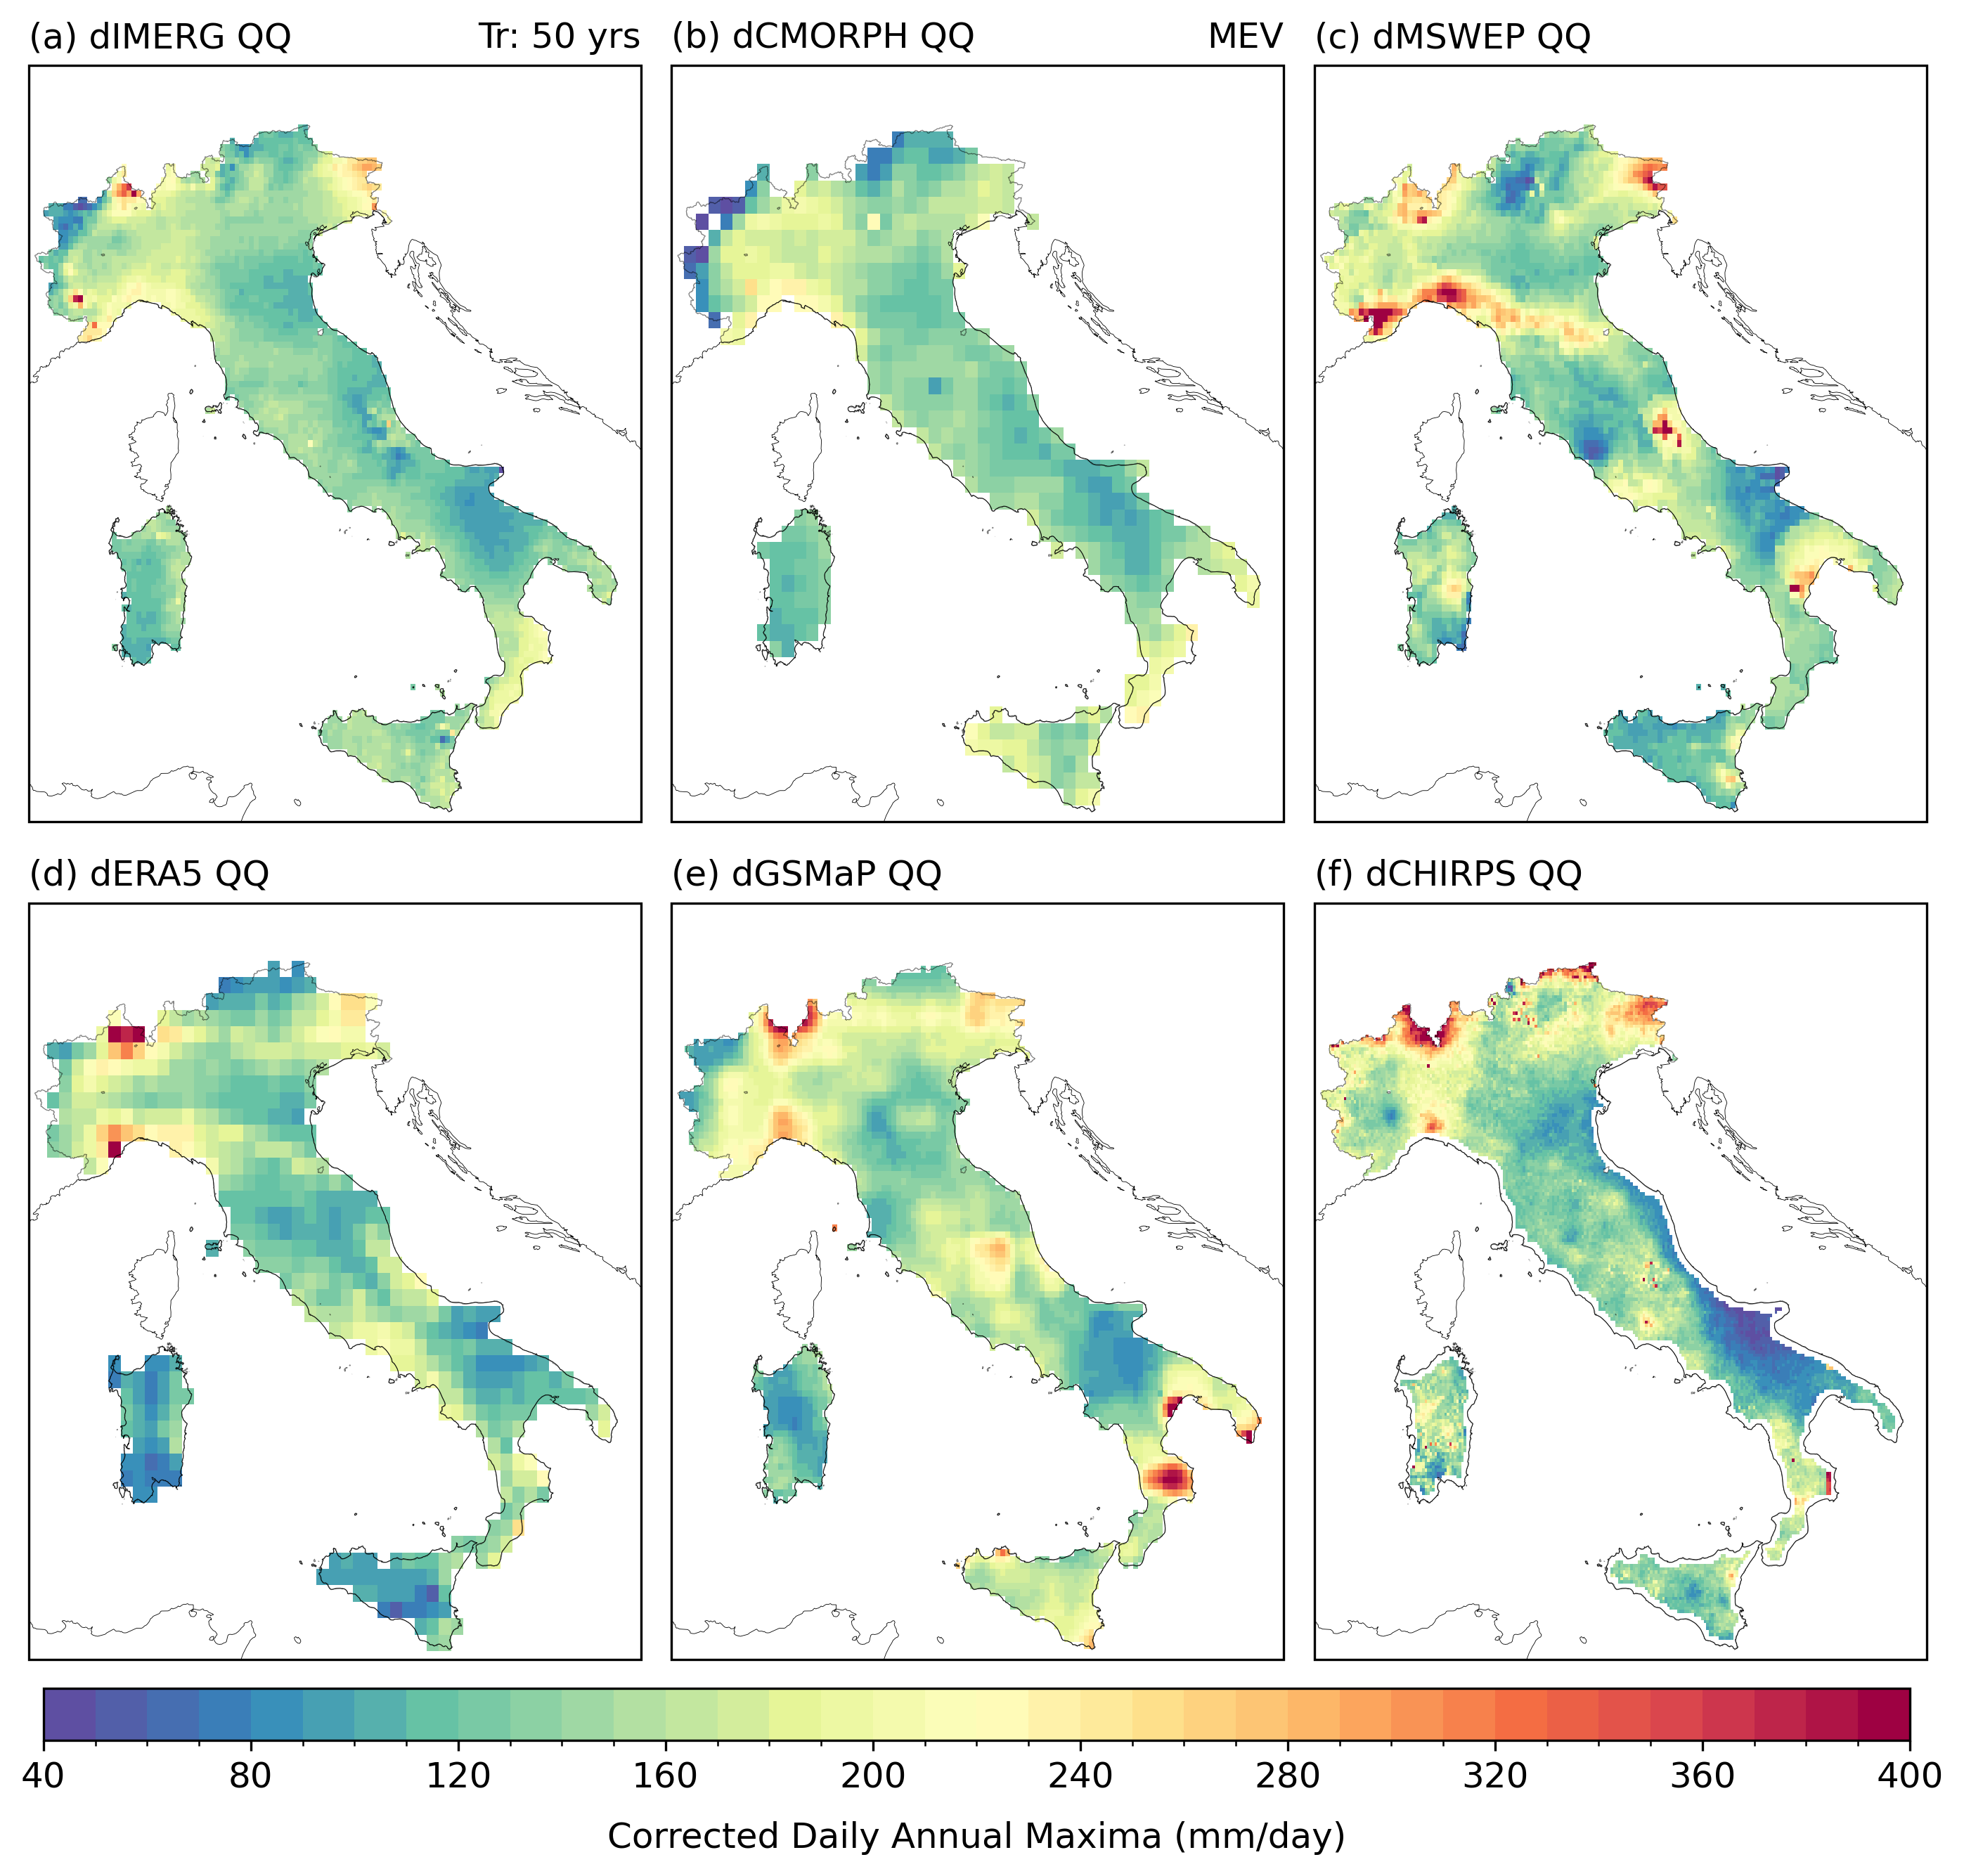

In [64]:
fonttitle = 12

GEV_cmap = plt.cm.Spectral_r
GEV_levels = np.arange(40,410,10)

GEV_norm = mcolors.BoundaryNorm(boundaries=GEV_levels, ncolors=GEV_cmap.N)
# GEV_norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8.5), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        # DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=15, alpha=0.6)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, Mev_dIMERG_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, Mev_dCMORPH_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, Mev_dMSWEP_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, Mev_dERA5_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, Mev_dGSMaP_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, Mev_dCHIRPS_mean, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

axes[0].set_title('(a) dIMERG QQ', fontsize=fonttitle, loc='left')
axes[0].set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH QQ', fontsize=fonttitle, loc='left')
axes[1].set_title(f'MEV', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP QQ', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5 QQ', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP QQ', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS QQ', fontsize=fonttitle, loc='left')

# ================================================================================================================================
cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Corrected Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ================================================================================================================================
# ================================================================================================================================

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.08)

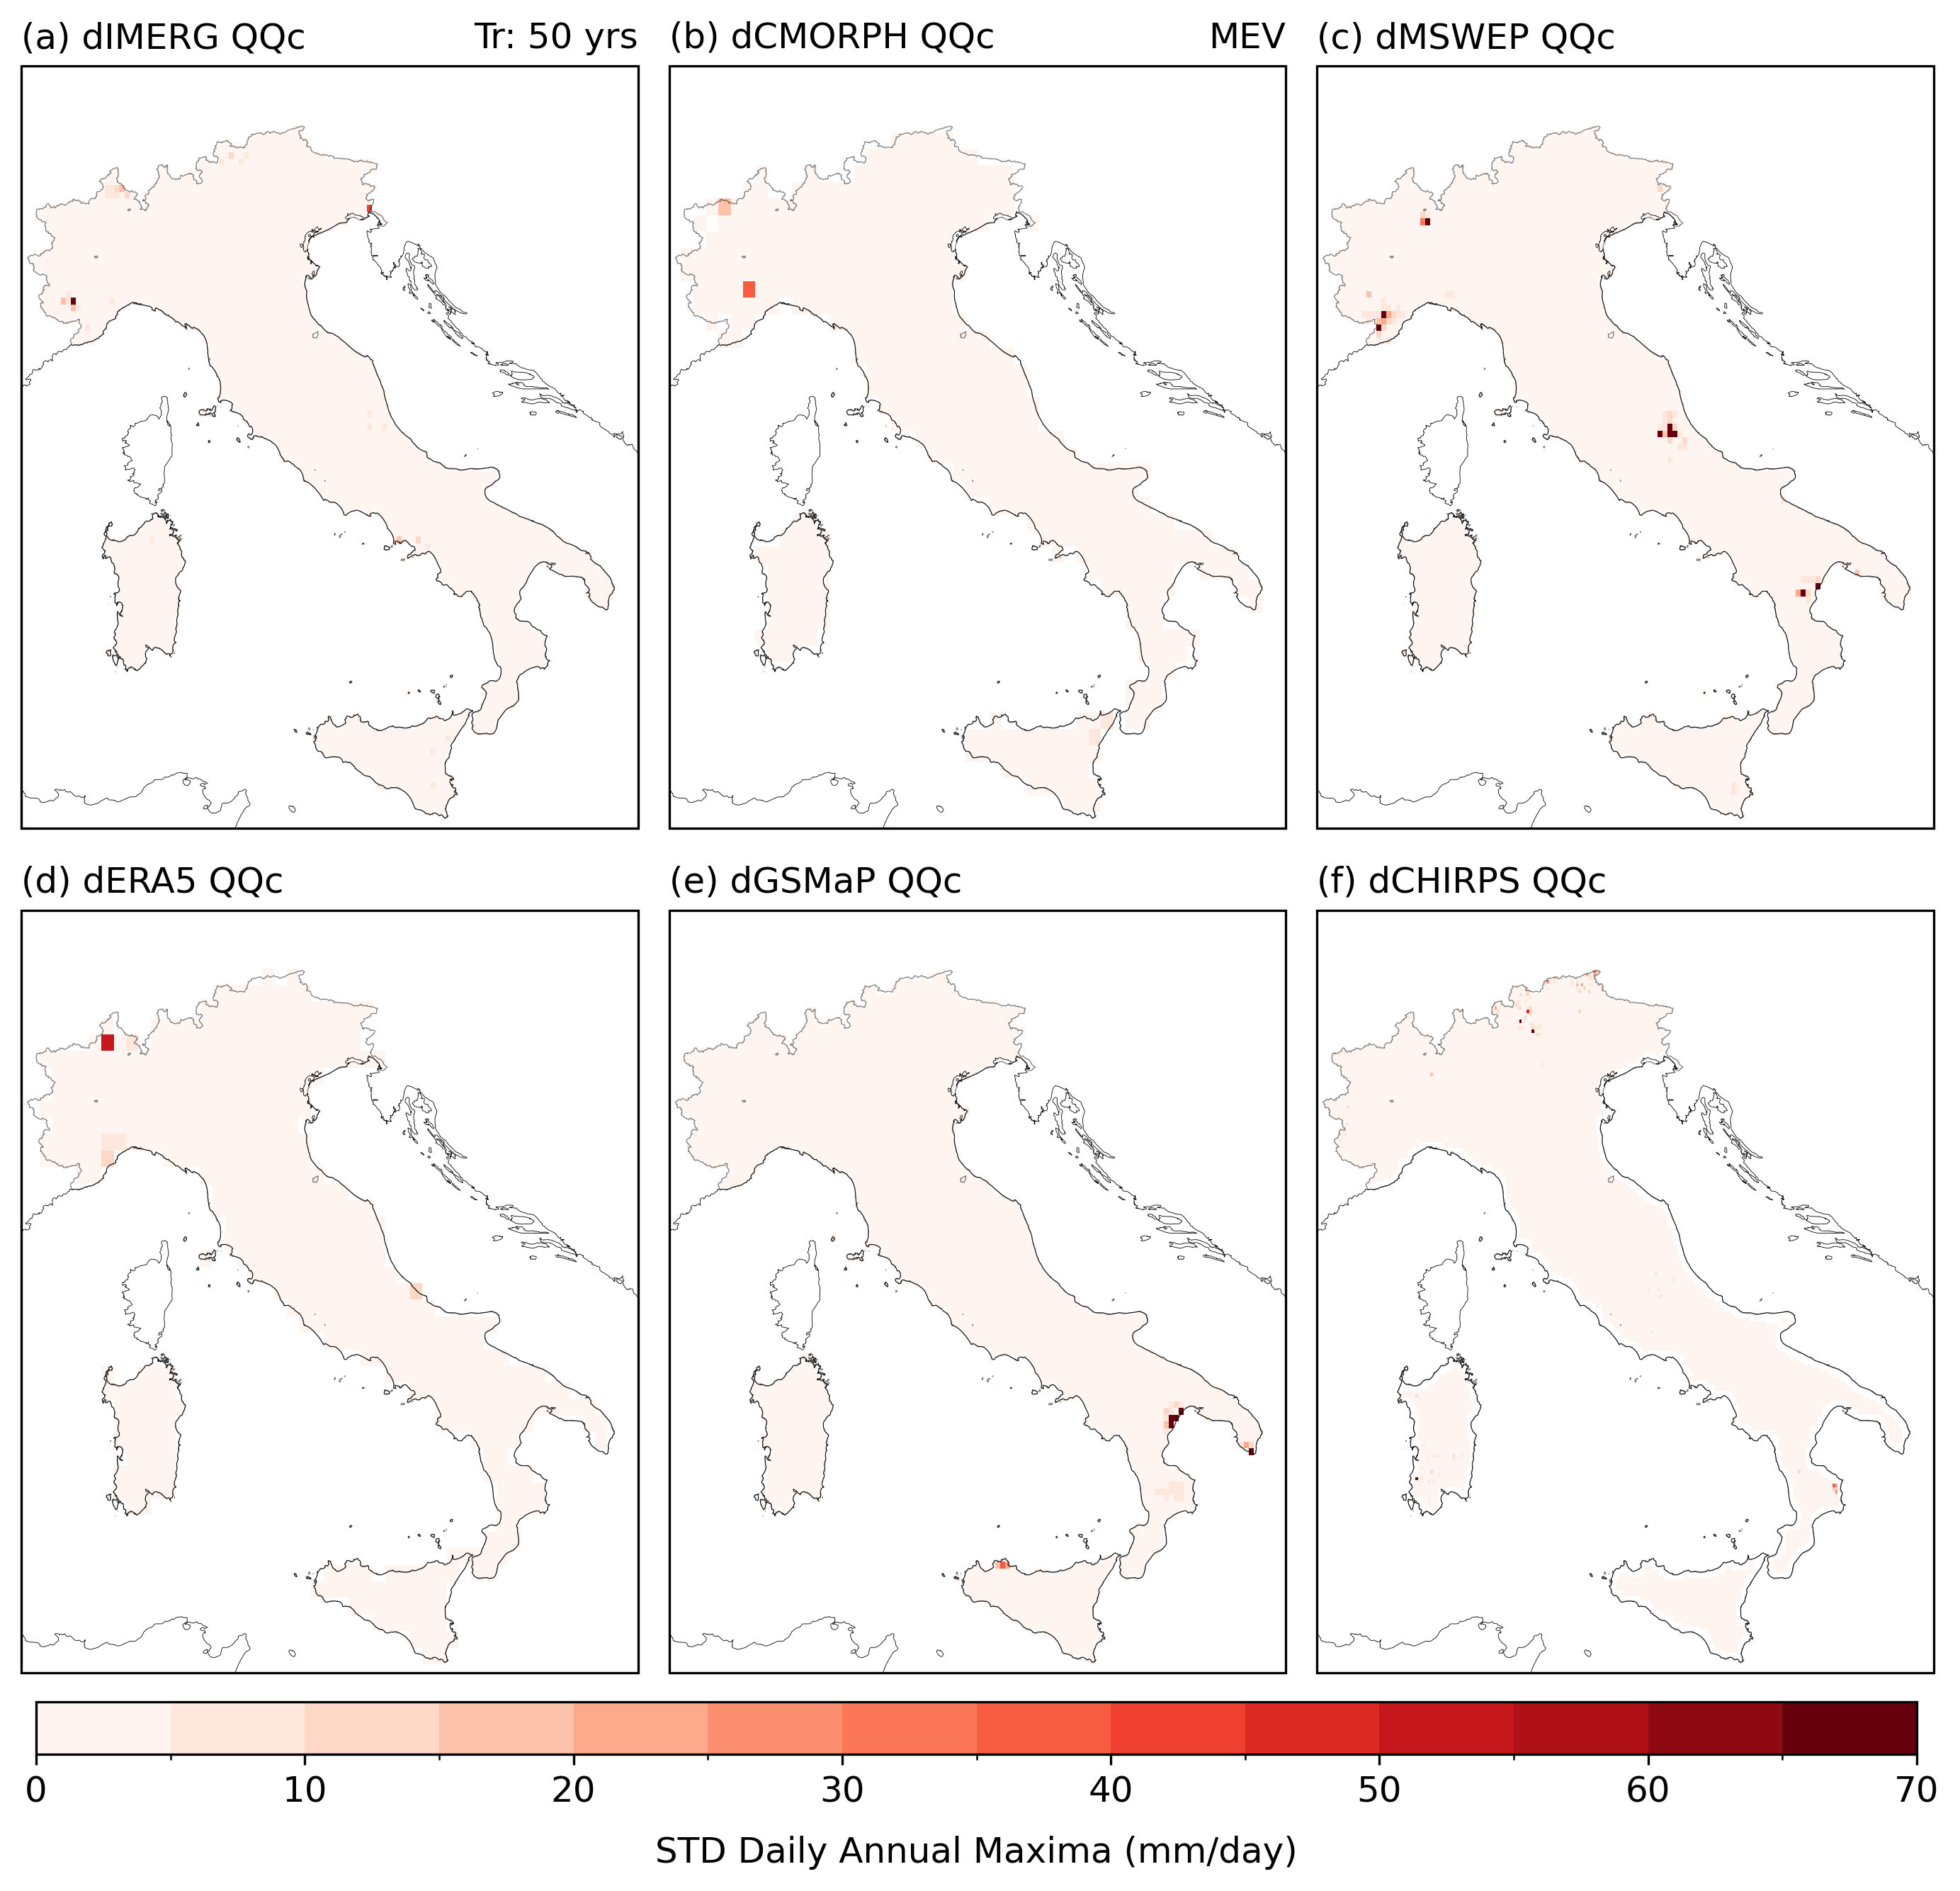

In [96]:
fonttitle = 12

GEV_cmap = plt.cm.Reds
GEV_levels = np.arange(0,75,5)

GEV_norm = mcolors.BoundaryNorm(boundaries=GEV_levels, ncolors=GEV_cmap.N)
# GEV_norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8.5), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        # DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=15, alpha=0.6)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, Mev_dIMERG_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, Mev_dCMORPH_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, Mev_dMSWEP_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, Mev_dERA5_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, Mev_dGSMaP_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, Mev_dCHIRPS_std, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

axes[0].set_title('(a) dIMERG QQc', fontsize=fonttitle, loc='left')
axes[0].set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH QQc', fontsize=fonttitle, loc='left')
axes[1].set_title(f'MEV', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP QQc', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5 QQc', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP QQc', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS QQc', fontsize=fonttitle, loc='left')

# ================================================================================================================================
cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("STD Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ================================================================================================================================
# ================================================================================================================================

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.08)

In [70]:
sat_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')
ENS_base = os.path.join(sat_base,'5_ENSEMBLE')
ENSEMBLE_SAT = 'ALL'
product, time_reso = 'ENSEMBLE_median', '1dy'
dir_in = os.path.join(ENS_base,f'ITALY_ENSEMBLE_{ENSEMBLE_SAT}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_median.nc')

DATA = xr.open_dataset(dir_in)
MEVd_MEDIAN = DATA.Mev_d

In [77]:
italy_geom = ITALY.union_all()
mask_italy = sv.contains(italy_geom, lon2dCH, lat2dCH)

MEVd_MEDIAN_italy = MEVd_MEDIAN.where(mask_italy) 

In [78]:
mask_nan = np.isnan(MEVd_MEDIAN_italy[pos,:,:])
Mev_dEnsemble_median_mean_masked = Mev_dEnsemble_median_mean.copy()
Mev_dEnsemble_median_mean_masked[mask_nan] = np.nan

Export figure to: ../figures/Article_down/Quantiles_corrected.png


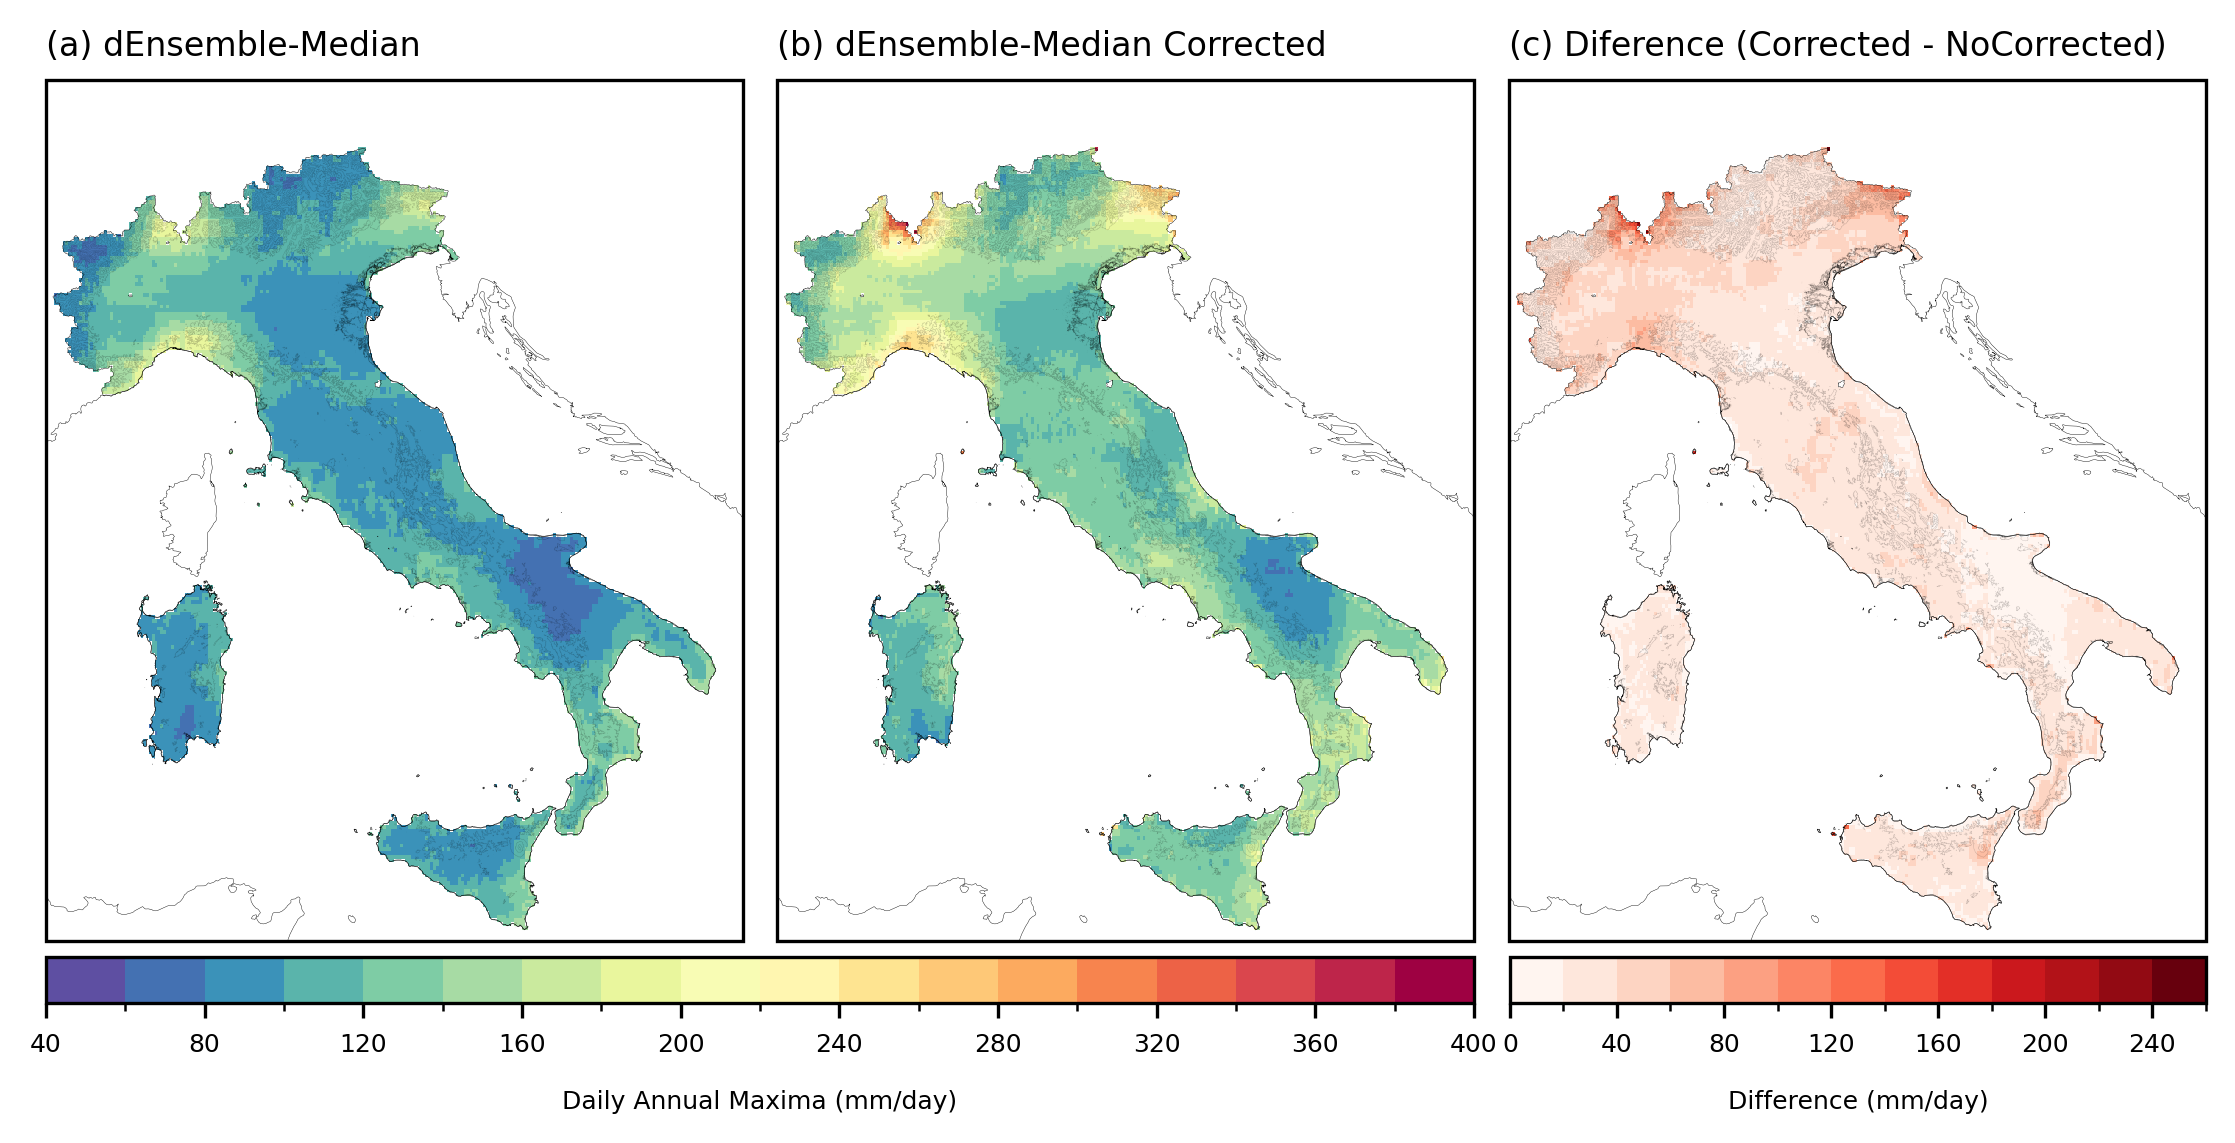

In [100]:
pos = 3

proj = ccrs.PlateCarree()

Mev_cmap = plt.cm.Spectral_r
diff_map = plt.cm.Reds

GEV_levels = np.arange(40,400+20,20)
DIFF_levels = np.arange(0,260+20,20)
norm = mcolors.BoundaryNorm(boundaries=GEV_levels, ncolors=Mev_cmap.N)
norm_diff = mcolors.BoundaryNorm(boundaries=DIFF_levels, ncolors=diff_map.N)
# norm = None
# norm_diff = None

fig = plt.figure(figsize=(8,4),dpi=300)
gs = gridspec.GridSpec(1,3)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
im = ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.2)
a1 = ax1.pcolormesh(lon2dCH, lat2dCH, MEVd_MEDIAN_italy[pos,:,:], cmap=Mev_cmap, norm=norm)

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04, orientation='horizontal')
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(a) dEnsemble-Median', loc='left', fontsize=8)

# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
im = ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.2)
a1 = ax1.pcolormesh(lon2dCH, lat2dCH, Mev_dEnsemble_median_mean_masked, cmap=Mev_cmap, norm=norm)

# cbar = plt.colorbar(a1, ax=ax1, fraction=0.056, pad=0.04, orientation='horizontal')
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(b) dEnsemble-Median Corrected', loc='left', fontsize=8)

# ===========================================================================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,edgecolor='k')
# ax1.add_feature(cfeature.BORDERS,linewidth=0.2,edgecolor='black',zorder=4)
im = ITALY.plot(legend=False, facecolor="none", edgecolor='black', linewidth=0.1, ax=ax1, zorder=10)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=21, alpha=0.2)
a2 = ax1.pcolormesh(lon2dCH, lat2dCH, Mev_dEnsemble_median_mean_masked-MEVd_MEDIAN_italy[pos,:,:], cmap=diff_map, norm=norm_diff)

# cbar = plt.colorbar(a2, ax=ax1, fraction=0.056, pad=0.04, orientation='horizontal')
# cbar.ax.tick_params(labelsize=6) 

ax1.set_title('(c) Diference (Corrected - NoCorrected)', loc='left', fontsize=8)

# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

cbar_ax = fig.add_axes([0.05, 0.09, 0.595, 0.038])
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=6)
cbar.set_label("Daily Annual Maxima (mm/day)", fontsize=6, labelpad=8)

cbar_ax = fig.add_axes([0.66, 0.09, 0.29, 0.038])
cbar = fig.colorbar(a2, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=6)
cbar.set_label("Difference (mm/day)", fontsize=6, labelpad=8)

salida = os.path.join('..','figures','Article_down',f'Quantiles_corrected.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)